In [ ]:
# !pip install pytorch-lightning
# !pip install torchlayers
# !pip install torchmetric
# !pip install dgl-cu113 dglgo -f https://data.dgl.ai/wheels/repo.html
# !pip install rich --upgrade
# from google.colab import drive
# drive.mount('/content/drive')

# 赛题背景介绍

  赛题描述
  反欺诈是金融行业永恒的主题，在互联网金融信贷业务中，数字金融反欺诈技术已经得到广泛应用并取得良好效果，这其中包括了近几年迅速发展并在各个领域得到越来越广泛应用的图神经网络。本届大赛的主办方信也科技，是一家致力于通过大数据、人工智能等先进技术，为互联网信贷用户与金融机构提供桥接平台的金融科技集团。在本届大赛中，信也科技以互联网智能风控为背景，从用户相互关联和影响的视角，探索满足风控反欺诈领域需求的，可拓展、高效的图神经网络应用方案，从而帮助更好地识别欺诈用户。

  数据描述

  本届大赛的初赛和复赛各提供一个脱敏的全连通的社交网络有向动态图，分别抽样于信也科技公司不同业务时间段的数据。在本届大赛提供的图数据中，节点代表信也科技的注册用户，从节点A指向节点B的有向边代表用户A将用户B填为他的紧急联系人。图中的边有不同的类型，代表了对紧急联系人的不同分类。图中的边上带有创建日期信息，初赛和复赛的两张图中，边的创建日期分别脱敏成从1开始的正整数，时间单位为天。另外，初赛和复赛的两张动态图均经过采样且包含小部分噪音。

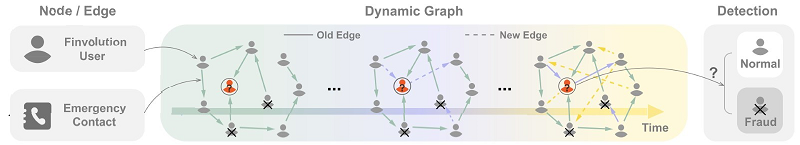

预测任务

本届大赛的预测任务为识别欺诈用户的节点预测任务。虽然本届大赛的图数据中有四类节点，但是预测任务只需要将欺诈用户（Class 1）从正常用户（Class 0）中区分出来；这两类节点被称为前景节点。图中另外两类用户（Class 2和 Class 3）尽管在数目上占据更大的比例，但是他们的分类与用户是否欺诈无关，因此预测任务不包含这两类节点；这两类节点被称为背景节点。

与常规的结构化数据不同，图算法可以通过研究对象之间的复杂关系来提高模型预测效果。而本届大赛除了提供前景节点之间的社交关系，还提供了大量的背景节点。希望选手可以充分挖掘各类用户之间的关联和影响力，提出可拓展、高效的图神经网络模型，将隐藏在正常用户中的欺诈用户识别出来。

初赛环节的图数据可下载，选手提交初赛测试样本的预测结果。

复赛环节的图数据不可下载，选手使用初赛图数据作为训练数据，提交docker镜像对复赛测试样本进行线上推断。

此外，基于安全考虑，复赛线上推断环节中容器内无可用网络，由于网络访问禁用导致无法运行代码的情况由选手自行承担后果。

本次比赛允许参赛选手使用其他公开图数据和公开模型，但参赛选手需要在2022/07/06日之前向主办方报备，注明使用的公开图数据、下载地址及公开模型。

In [13]:
import numpy as np
import pandas as pd
from IPython.core.display import HTML
path ='/content/drive/Shareddrives/137074046的5T空间/competitions/tianchi_competitions/信野图数据比赛/'


def value_counts_all(df, columns):
    pd.set_option('display.max_rows', 50)
    table_list = []
    for col in columns:
        table_list.append(pd.DataFrame(df[col].value_counts(dropna=False)))
    return HTML(
        f"<table><tr> {''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list])} </tr></table>")
    
nodes = np.load(path+'x.npy')
node_labels = np.load(path+'y.npy')
nodes = pd.DataFrame(nodes)
train_mask = np.load(path+'train_mask.npy')
test_mask = np.load(path+'test_mask.npy')

In [14]:
value_counts_all(nodes,list(nodes.columns))

,0
0.0,2415250
-1.0,903048
1.0,740737
,1
-1.0,905107
5.0,562905
3.0,497792
4.0,486685
6.0,365986
7.0,313420


In [15]:
map_cols = {0:'cat_0',1:'cat_1',2:'num_2',3:'num_3',4:'num_4',5:'num_5',6:'num_6',7:'num_7',8:'num_8',9:'num_9',10:'cat_10',11:'num_11',12:'num_12',13:'num_13',14:'num_14',15:'num_15',16:'num_16'}
cols = list(nodes.columns)
cols=[map_cols[key] for key in cols]
nodes.columns = cols
nodes['missing_num'] = (nodes==-1).sum(axis=1)
display(nodes.head(10))

,cat_0,cat_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,cat_10,num_11,num_12,num_13,num_14,num_15,num_16,missing_num
0,0.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14
1,0.0,2.0,0.680,0.505,0.742647,0.7,0.319,0.015,0.281,0.880878,1.0,0.257353,0.119122,0.069307,0.857143,0.007353,0.142857,0
2,0.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14
3,0.0,3.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14
4,0.0,-1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,15
5,0.0,2.0,0.045,0.025,0.555556,-1.0,0.010,-1.000,0.006,0.600000,0.0,0.444444,0.400000,-1.000000,-1.000000,-1.000000,-1.000000,6
6,0.0,3.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14
7,1.0,0.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14
8,1.0,1.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14
9,0.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14


In [16]:
# (nodes.missing_num/len(map_cols)).value_counts() # impute with ae or ignore?

In [17]:
nodes['labels']= node_labels

# baseline lgb

In [58]:
X = nodes[nodes.labels.isin([0,1])]
y =X.pop('labels')
X_test = nodes.loc[test_mask]

In [59]:
X_test

,cat_0,cat_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,cat_10,num_11,num_12,num_13,num_14,num_15,num_16,missing_num,labels
3804756,0.0,5.0,0.895,0.775,0.865922,1.0,0.919,0.103,0.889,0.967356,2.0,0.134078,0.032644,0.064516,0.700000,0.011173,0.200000,0,-100
690432,0.0,6.0,3.470,3.020,0.870317,3.8,9.767,0.920,9.648,0.987816,5.0,0.129683,0.012184,0.062914,0.736842,0.007205,0.131579,0,-100
1250623,0.0,2.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14,-100
3555130,0.0,8.0,0.280,0.245,0.875000,0.1,0.333,0.001,0.325,0.975976,1.0,0.125000,0.024024,0.020408,1.000000,0.017857,1.000000,0,-100
1228284,0.0,6.0,-1.000,-1.000,-1.000000,-1.0,-1.000,-1.000,-1.000,-1.000000,0.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,14,-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280026,1.0,5.0,0.785,0.610,0.777070,0.2,0.911,0.125,0.861,0.945115,0.0,0.222930,0.054885,0.016393,1.500000,-1.000000,-1.000000,2,-100
652821,0.0,3.0,0.590,0.495,0.838983,0.7,0.567,0.034,0.547,0.964727,2.0,0.161017,0.035273,0.070707,0.714286,0.016949,0.285714,0,-100
332129,0.0,0.0,0.855,0.735,0.859649,0.7,0.579,0.043,0.545,0.941278,2.0,0.140351,0.058722,0.047619,0.857143,0.011696,0.285714,0,-100
1770785,0.0,4.0,2.085,1.485,0.712230,2.2,3.421,0.830,3.267,0.954984,0.0,0.287770,0.045016,0.074074,0.772727,-1.000000,-1.000000,2,-100


In [44]:

def experiments(score,y_preds):
  for fold_n, (train_index, valid_index) in enumerate(splits):
      X_train, X_valid = X[columns].iloc[train_index], X[columns].iloc[valid_index]
      y_train, y_valid = y.iloc[train_index], y.iloc[valid_index]
      
      dtrain = lgb.Dataset(X_train, label=y_train)
      dvalid = lgb.Dataset(X_valid, label=y_valid)

      clf = lgb.train(params, dtrain, 10000, valid_sets = [dtrain, dvalid], verbose_eval=200, early_stopping_rounds=250)
      
      feature_importances[f'fold_{fold_n + 1}'] = clf.feature_importance()
      
      y_pred_valid = clf.predict(X_valid)
      y_oof[valid_index] = y_pred_valid
      print(f"Fold {fold_n + 1} | AUC: {roc_auc_score(y_valid, y_pred_valid)}")
      
      score += roc_auc_score(y_valid, y_pred_valid) / NFOLDS
      y_preds += clf.predict(X_test) / NFOLDS
      
      del X_train, X_valid, y_train, y_valid
      gc.collect()
      
  print(f"\nMean AUC = {score}")
  print(f"Out of folds AUC = {roc_auc_score(y, y_oof)}")
  return y_preds

# without graph features

In [80]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47,'n_jobs':-1
         }
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS,shuffle=True,random_state=42)

columns = X.columns
splits = folds.split(X, y)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns

experiments(score,y_preds)

Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.816278	valid_1's auc: 0.736441
Early stopping, best iteration is:
[7]	training's auc: 0.77503	valid_1's auc: 0.73753
Fold 1 | AUC: 0.7375295007737216
Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.817982	valid_1's auc: 0.729619
Early stopping, best iteration is:
[84]	training's auc: 0.797537	valid_1's auc: 0.730303
Fold 2 | AUC: 0.7303033197706601
Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.81523	valid_1's auc: 0.735034
Early stopping, best iteration is:
[110]	training's auc: 0.800123	valid_1's auc: 0.735643
Fold 3 | AUC: 0.7356429961203175
Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.81397	valid_1's auc: 0.740205
Early stopping, best iteration is:
[40]	training's auc: 0.782948	valid_1's auc: 0.741367
Fold 4 | AUC: 0.7413667024409467
Training until validation scores don't impro

In [69]:
# sub = pd.DataFrame(1-y_preds)
# sub[1]=y_preds
# np.save(path+'/submit/submit_lightgbm_base',sub.values) public board is stable
# 0.734469


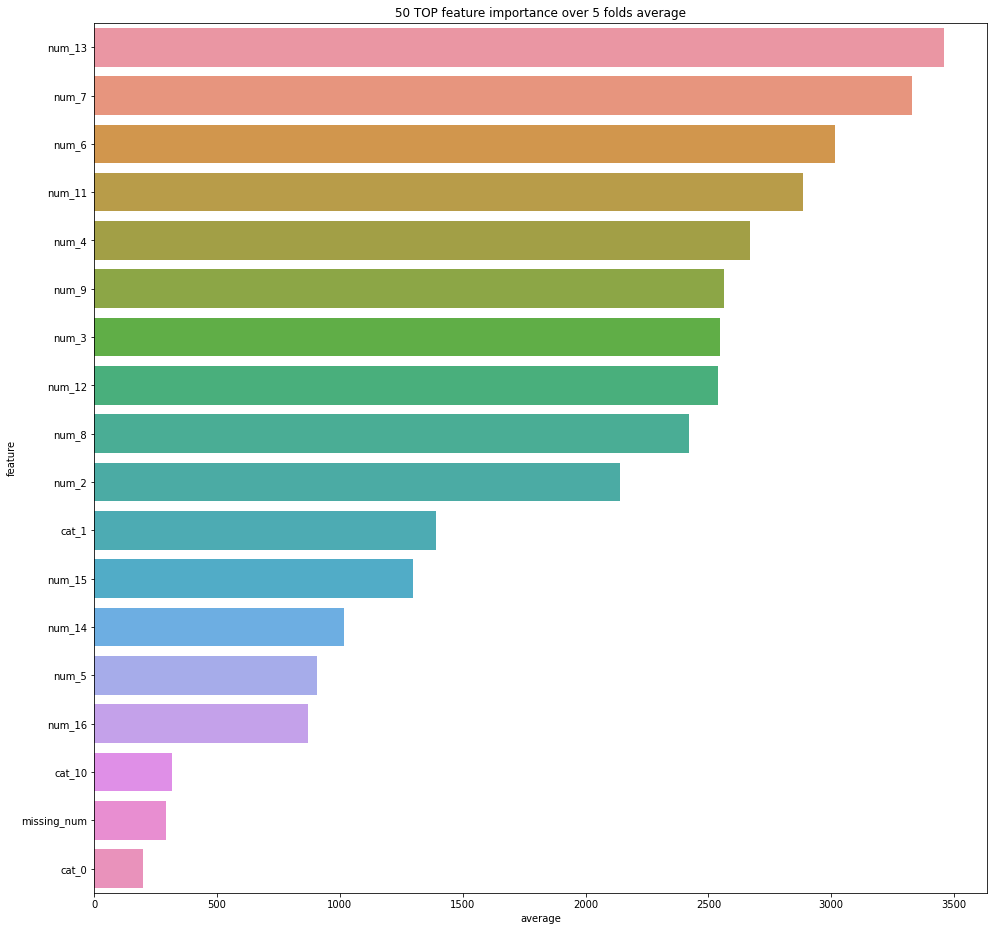

In [72]:
import matplotlib.pyplot as plt
import seaborn as sns
feature_importances['average'] = feature_importances[[f'fold_{fold_n + 1}' for fold_n in range(folds.n_splits)]].mean(axis=1)
feature_importances.to_csv('feature_importances.csv')

plt.figure(figsize=(16, 16))
sns.barplot(data=feature_importances.sort_values(by='average', ascending=False).head(50), x='average', y='feature');
plt.title('50 TOP feature importance over {} folds average'.format(folds.n_splits));

## add category

In [83]:
X[['cat_0','cat_1','cat_10']] = X[['cat_0','cat_1','cat_10']].astype('category')
X_test[['cat_0','cat_1','cat_10']] = X_test[['cat_0','cat_1','cat_10']].astype('category')
score=0
y_preds = np.zeros(X_test.shape[0])
folds = StratifiedKFold(n_splits=NFOLDS,shuffle=True,random_state=42)
splits = folds.split(X, y)

experiments(score,y_preds)

/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.81605	valid_1's auc: 0.735886
Early stopping, best iteration is:
[91]	training's auc: 0.797244	valid_1's auc: 0.73713
Fold 1 | AUC: 0.7371301051536799


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.817266	valid_1's auc: 0.728775
Early stopping, best iteration is:
[138]	training's auc: 0.807411	valid_1's auc: 0.730054
Fold 2 | AUC: 0.7300536626892211


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.815131	valid_1's auc: 0.734883
Early stopping, best iteration is:
[87]	training's auc: 0.795165	valid_1's auc: 0.735496
Fold 3 | AUC: 0.7354961823503522


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.813207	valid_1's auc: 0.739943
Early stopping, best iteration is:
[99]	training's auc: 0.795045	valid_1's auc: 0.740362
Fold 4 | AUC: 0.74036202961428


/usr/local/lib/python3.7/dist-packages/lightgbm/basic.py:762: UserWarning: categorical_feature in param dict is overridden.
  warnings.warn('categorical_feature in param dict is overridden.')


Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.816861	valid_1's auc: 0.728946
Early stopping, best iteration is:
[117]	training's auc: 0.803376	valid_1's auc: 0.729689
Fold 5 | AUC: 0.7296886472217264

Mean AUC = 0.7345461254058521
Out of folds AUC = 0.7302923333076077


# replace nan

In [84]:
X[['cat_0','cat_1','cat_10']] = X[['cat_0','cat_1','cat_10']].astype(float)
X_test[['cat_0','cat_1','cat_10']] = X_test[['cat_0','cat_1','cat_10']].astype(float)
X.replace(-1,np.nan,inplace=True)
X_test.replace(-1,np.nan,inplace=True)

score=0
y_preds = np.zeros(X_test.shape[0])
folds = StratifiedKFold(n_splits=NFOLDS,shuffle=True,random_state=42)
splits = folds.split(X, y)

experiments(score,y_preds)

Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.817664	valid_1's auc: 0.736747
Early stopping, best iteration is:
[14]	training's auc: 0.779442	valid_1's auc: 0.737623
Fold 1 | AUC: 0.7376225760309221
Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.819499	valid_1's auc: 0.729998
Early stopping, best iteration is:
[84]	training's auc: 0.798758	valid_1's auc: 0.730911
Fold 2 | AUC: 0.7309111625284126
Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.816843	valid_1's auc: 0.734852
[400]	training's auc: 0.83784	valid_1's auc: 0.734046
Early stopping, best iteration is:
[255]	training's auc: 0.824868	valid_1's auc: 0.735107
Fold 3 | AUC: 0.7351070395117973
Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.815729	valid_1's auc: 0.740398
Early stopping, best iteration is:
[85]	training's auc: 0.795511	valid_1's auc: 0.741323
Fold 4 | AUC: 0.74

In [85]:
X

,cat_0,cat_1,num_2,num_3,num_4,num_5,num_6,num_7,num_8,num_9,cat_10,num_11,num_12,num_13,num_14,num_15,num_16,missing_num
1,0.0,2.0,0.680,0.505,0.742647,0.7,0.319,0.015,0.281,0.880878,1.0,0.257353,0.119122,0.069307,0.857143,0.007353,0.142857,0.0
24,0.0,2.0,0.550,0.485,0.881818,0.5,0.326,0.045,0.313,0.960123,0.0,0.118182,0.039877,0.051546,0.600000,NaN,NaN,2.0
41,0.0,2.0,0.055,0.055,1.000000,NaN,0.076,NaN,0.076,1.000000,0.0,NaN,NaN,NaN,NaN,NaN,NaN,8.0
51,0.0,0.0,2.835,2.530,0.892416,1.7,4.316,0.108,4.234,0.981001,2.0,0.107584,0.018999,0.033597,0.764706,0.003527,0.117647,0.0
57,0.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4058336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
4058340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
4058342,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0
4058356,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,16.0


# add graph topology features

In [1]:
import numpy as np
import pandas as pd
from IPython.core.display import HTML
path ='/content/drive/Shareddrives/137074046的5T空间/competitions/tianchi_competitions/信野图数据比赛/'


In [2]:
edges = np.load(path+'edge_index.npy')
edge_type = np.load(path+'edge_type.npy')
edge_timestamp = np.load(path+'edge_timestamp.npy')

edges = pd.DataFrame(edges,columns=['source','target'])
edges['edge_type'] = edge_type
edges['edge_typestamp'] = edge_timestamp
edges

,source,target,edge_type,edge_typestamp
0,0,3151644,3,567
1,1,124194,5,195
2,1,3678931,1,399
3,5,87903,5,498
4,5,911977,5,498
...,...,...,...,...
4962027,4057108,1725954,10,578
4962028,4057108,4019789,9,578
4962029,4057114,2180496,9,578
4962030,4057117,3628100,10,578


In [3]:
import sknetwork
#num_nodes = nodes.shape[0]
edgelists = edges[['source','target']].values.tolist()

In [4]:
edges['cnt']=1
edges.groupby(['source','target'])['cnt'].sum() # no duplicated edges

source   target 
0        3151644    1
1        124194     1
         3678931    1
5        87903      1
         911977     1
                   ..
4057108  1725954    1
         4019789    1
4057114  2180496    1
4057117  3628100    1
4057120  1592353    1
Name: cnt, Length: 4962032, dtype: int64

In [5]:
graph = sknetwork.data.from_edge_list(edgelists,directed=True)  # directed or undirected?

In [7]:
from nodevectors import Node2Vec
g2v = Node2Vec(
    n_components=256,
    walklen=7,keep_walks=False,epochs=5,
)
g2v.fit(graph)


Making walks... 

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Done, T=5.60
Mapping Walk Names... Done, T=163.80
Training W2V... WARNING: gensim word2vec version is unoptimizedTry version 3.6 if on windows, versions 3.7 and 3.8 have had issues
Done, T=4076.06


In [10]:
g2v.save_vectors(path+'node2vec')

In [28]:
n = list(nodes.index)
from tqdm import tqdm
emb=[]
for i in tqdm(n):
  emb+=[g2v.predict(i)]
embs = np.stack(emb)
nodes= pd.concat([nodes,pd.DataFrame(embs,columns=[f'n2v_{i}' for i in range(embs.shape[1])])],axis=1)

100%|██████████| 4059035/4059035 [00:10<00:00, 384983.37it/s]


In [39]:
import gc
gc.collect()

642

In [40]:
X = nodes[nodes.labels.isin([0,1])]
y =X.pop('labels')
X_test = nodes.loc[test_mask]

# add graph topology features

In [46]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import roc_auc_score
import lightgbm as lgb
import gc

params = {'num_leaves': 491,
          'min_child_weight': 0.03454472573214212,
          'feature_fraction': 0.3797454081646243,
          'bagging_fraction': 0.4181193142567742,
          'min_data_in_leaf': 106,
          'objective': 'binary',
          'max_depth': -1,
          'learning_rate': 0.006883242363721497,
          "boosting_type": "gbdt",
          "bagging_seed": 11,
          "metric": 'auc',
          "verbosity": -1,
          'reg_alpha': 0.3899927210061127,
          'reg_lambda': 0.6485237330340494,
          'random_state': 47,'n_jobs':-1
         }
NFOLDS = 5
folds = StratifiedKFold(n_splits=NFOLDS,shuffle=True,random_state=42)

columns = X.columns
splits = folds.split(X, y)
y_preds = np.zeros(X_test.shape[0])
y_oof = np.zeros(X.shape[0])
score = 0

feature_importances = pd.DataFrame()
feature_importances['feature'] = columns
y_preds = experiments(score,y_preds)

Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.943066	valid_1's auc: 0.787602
[400]	training's auc: 0.990154	valid_1's auc: 0.789226
[600]	training's auc: 0.999188	valid_1's auc: 0.789935
[800]	training's auc: 0.999963	valid_1's auc: 0.790016
Early stopping, best iteration is:
[623]	training's auc: 0.999383	valid_1's auc: 0.790131
Fold 1 | AUC: 0.7901305887312591
Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.943329	valid_1's auc: 0.783434
[400]	training's auc: 0.989938	valid_1's auc: 0.784617
[600]	training's auc: 0.999343	valid_1's auc: 0.785274
[800]	training's auc: 0.999985	valid_1's auc: 0.785474
[1000]	training's auc: 1	valid_1's auc: 0.785128
Early stopping, best iteration is:
[819]	training's auc: 0.999994	valid_1's auc: 0.785566
Fold 2 | AUC: 0.7855662909157748
Training until validation scores don't improve for 250 rounds.
[200]	training's auc: 0.943982	valid_1's auc: 0.776591
[400]	training's auc:

In [47]:
sub = pd.DataFrame(1-y_preds)
sub[1]=y_preds
np.save(path+'/submit/submit_lightgbm_with_n2v',sub.values)# public board is stable
#0.734469
